# Ch 5. 非監督式學習：降維與分群
## 5-1. 主成份分析
***

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

df = pd.read_csv('Pokemon_894_12.csv')
df.head(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False


In [2]:
# 標準化
from sklearn.preprocessing import StandardScaler

cols = ['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed']
scaler = StandardScaler().fit(df[cols])
cols_std = scaler.transform(df[cols])
df_std = pd.DataFrame(cols_std, columns=cols)
df_std.describe()

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
count,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02
mean,2.429079e-16,3.303348e-17,-1.065283e-16,2.583069e-17,-1.154930e-17,-4.570046e-17
std,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00
min,-2.668698e+00,-2.290872e+00,-2.217458e+00,-1.916752e+00,-1.874986e+00,-2.160820e+00
25%,-7.588604e-01,-7.605427e-01,-7.800513e-01,-7.079864e-01,-8.015527e-01,-7.941122e-01
50%,-1.352399e-01,-1.484111e-01,-1.412039e-01,-2.546993e-01,-8.593067e-02,-1.107584e-01
75%,4.104281e-01,6.167534e-01,4.976436e-01,6.518748e-01,6.296913e-01,7.434340e-01
max,7.231278e+00,3.371345e+00,4.969576e+00,3.643570e+00,5.639045e+00,3.818526e+00


In [3]:
# 進行 PCA
from sklearn.decomposition import PCA

num_pc = 2
pca = PCA(n_components=num_pc)
pca.fit(df_std)

loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(num_pc)]
loadings

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
PC1,0.393787,0.443033,0.369369,0.457304,0.445262,0.323783
PC2,0.039396,-0.034400,0.619764,-0.293366,0.275120,-0.671865


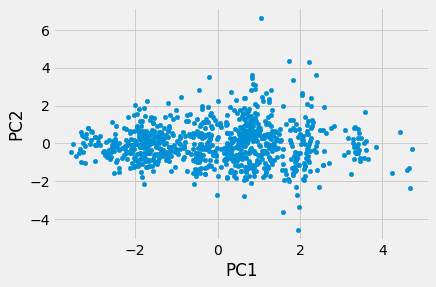

In [4]:
pc_scores = pd.DataFrame(pca.transform(df_std))
pc_scores.columns = ['PC'+str(i+1) for i in range(num_pc)]
pc_scores.plot(kind='scatter', x='PC1', y='PC2');

In [5]:
num_pc = 6
pca = PCA(n_components=num_pc)
pca.fit(df_std)
print(pca.explained_variance_) # 特徵值
print(pca.explained_variance_ratio_) # 解釋變異比例

[2.70133767 1.12469922 0.78692388 0.71251463 0.42096102 0.26028251]
[0.44971934 0.18724019 0.13100727 0.11861961 0.07008169 0.04333189]


In [6]:
pca = PCA(n_components=0.8) # 解釋 80% 的變異
pca.fit(df_std)
print(pca.explained_variance_) 
print(pca.explained_variance_ratio_)

loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(pca.n_components_)]
loadings

[2.70133767 1.12469922 0.78692388 0.71251463]
[0.44971934 0.18724019 0.13100727 0.11861961]


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
PC1,0.393787,0.443033,0.369369,0.457304,0.445262,0.323783
PC2,0.039396,-0.034400,0.619764,-0.293366,0.275120,-0.671865
PC3,-0.485325,-0.578250,0.033621,0.332590,0.552728,0.113274
PC4,0.710255,-0.415154,-0.406510,0.168762,0.176726,-0.313404


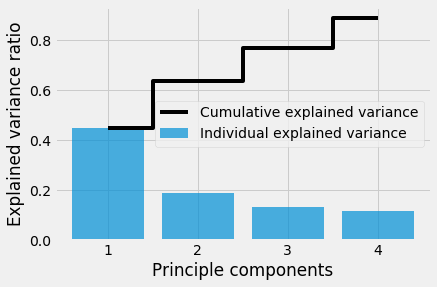

In [7]:
import numpy as np

var = np.array(pca.explained_variance_ratio_)
cum_var = np.cumsum(var)
plt.bar(range(1, len(var)+1), var, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cum_var)+1), cum_var, where='mid', color='k',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle components')
plt.legend();

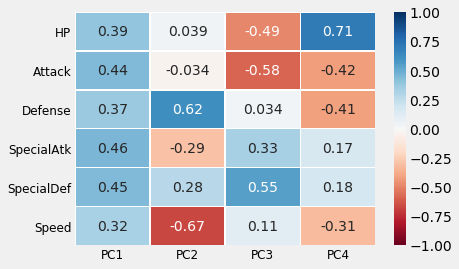

In [8]:
import seaborn as sns

ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), fontsize=12);

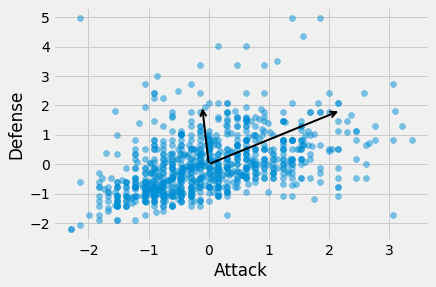

In [9]:
# 設定箭頭參數
arrow_props = dict(arrowstyle='->', linewidth='2', color='k')

def draw_arrow(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrow_props)
    
plt.scatter(df_std['Attack'], df_std['Defense'], alpha=.5)

# 以箭頭顯示 PC1 與 PC2
for len_, vec in zip(pca.explained_variance_[:2], pca.components_[:2]):
    v = vec[1:3]*3*np.sqrt(len_)
    draw_arrow(pca.mean_[1:3], pca.mean_[1:3] + v)
    
plt.xlabel('Attack')
plt.ylabel('Defense');

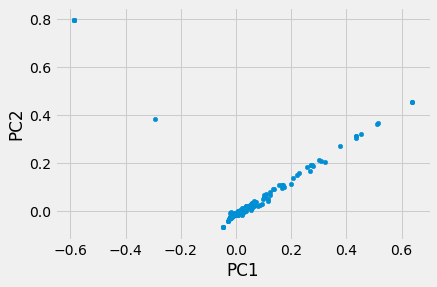

In [10]:
# 進行 KPCA (rbf)
from sklearn.decomposition import KernelPCA

num_pc = 2
kpca = KernelPCA(n_components=num_pc, kernel='rbf', gamma=5)
X_kpca = kpca.fit_transform(df_std)

pc_scores = pd.DataFrame(X_kpca)
pc_scores.columns = ['PC'+str(i+1) for i in range(num_pc)]
pc_scores.plot(kind='scatter', x='PC1', y='PC2');

In [11]:
clt_1, clt_2 = [], [] 
for idx in pc_scores.index:
    if pc_scores.iloc[idx, 1] > 0.7:
        clt_1.append(df.iloc[idx, 1])
    elif (-0.4 < pc_scores.iloc[idx, 0] < -0.2):
        clt_2.append(df.iloc[idx, 1])
        
print(clt_1)
print(clt_2)

['夢幻', '時拉比', '基拉祈', '瑪納霏', '謝米-Land', '比克提尼']
['銀伴戰獸']
